![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/06_Principal%20Component%20Analysis%20%28PCA%29/06_dimensionality-reduction-pca_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 06 | Principal Component Analysis (PCA)

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [19]:
import seaborn as sns #!

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
dodge coronet brougham,16.0,8,318.0,150.0,4190,13.0,76,usa
volkswagen 411 (sw),22.0,4,121.0,76.0,2511,18.0,72,europe
mercury zephyr 6,19.8,6,200.0,85.0,2990,18.2,79,usa
honda civic,24.0,4,120.0,97.0,2489,15.0,74,japan
pontiac j2000 se hatchback,31.0,4,112.0,85.0,2575,16.2,82,usa


## Data Preprocessing

- All variables need to be **comparables**.
- It is not the same to increase 1kg of weight, than 1m of height.
- We will use `StandardScaler()`.

In [20]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [22]:
df = df.dropna()

In [23]:
import pandas as pd

In [24]:
pd.get_dummies(df, drop_first=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,1
...,...,...,...,...,...,...,...,...,...
ford ranger,28.0,4,120.0,79.0,2625,18.6,82,0,1
chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,0,1


In [25]:
df = pd.get_dummies(df, drop_first=True)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
datanorm = scaler.fit_transform(df)

In [29]:
df_norm = pd.DataFrame(datanorm, index=df.index, columns=df.columns)

In [30]:
df_norm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
...,...,...,...,...,...,...,...,...,...
ford ranger,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.50239,0.774597
chevy s-10,0.969088,-0.864014,-0.721574,-0.584501,-0.303641,1.400433,1.636410,-0.50239,0.774597


## `KMeans()` Model in Python

### Fit the Model

In [31]:
from sklearn.cluster import KMeans

In [54]:
model_km = KMeans(n_clusters=5)

In [55]:
model_km.fit(X=df_norm)

KMeans(n_clusters=5)

### Calculate Predictions

In [56]:
model_km.predict(X=df_norm)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 3, 4, 0, 0, 0,
       0, 0, 3, 1, 1, 1, 1, 4, 2, 4, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 3, 3, 2, 0, 0, 0, 4, 4, 0, 2, 4, 2, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 0, 0, 0, 0, 2, 4, 4, 2, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 3, 4, 2, 4,
       4, 2, 3, 0, 1, 1, 0, 0, 0, 0, 1, 0, 4, 1, 3, 3, 3, 4, 2, 4, 2, 3,
       3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 4, 4, 2, 0, 0, 4, 4, 0, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 4, 2, 3, 2, 4, 0, 4, 3, 0, 3, 0,
       0, 0, 0, 4, 0, 0, 2, 2, 0, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 0, 4, 3,
       3, 3, 3, 0, 4, 4, 2, 0, 1, 0, 4, 3, 1, 1, 1, 1, 4, 2, 0, 2, 4, 1,
       3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 0, 2, 4, 2, 2, 2, 4, 0, 4, 0, 4,
       0, 2, 4, 4, 4, 3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1,
       2, 4, 4, 2, 4, 2, 2, 4, 0, 3, 0, 3, 0, 4, 3, 3, 2, 3, 3, 3, 1, 1,
       3, 1, 1, 3, 1, 0, 4, 2, 2, 0, 3, 0, 3, 2, 2,

### Create a New DataFrame for the Predictions

In [57]:
df_pred = df_norm.copy()

In [58]:
df_pred.insert(0, 'pred', model_km.predict(X=df_norm))

In [59]:
df_pred

,pred,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,,
chevrolet chevelle malibu,1,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
...,...,...,...,...,...,...,...,...,...,...
ford ranger,2,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.50239,0.774597
chevy s-10,2,0.969088,-0.864014,-0.721574,-0.584501,-0.303641,1.400433,1.636410,-0.50239,0.774597


### Visualize the Model

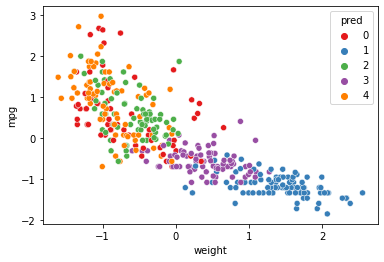

In [60]:
sns.scatterplot(x='weight', y='mpg', hue='pred',
                data=df_pred, palette='Set1');

### Model Interpretation

- Does the visualization makes sense?
- The points are mixed between the groups, why?
- We are **just representing 2 variables**
- And the model was **fitted with 7 variables**

## Grouping Variables with `PCA()`

In [61]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/HMOI_lkzW08" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Transform Data to Components

- `PCA()` is another technique used to transform data.

How has the data been manipulated so far?

1. Original Data `df`
2. Normalized Data `dfnorm`
3. Principal Components Data `dfpca` (now)

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA()

In [64]:
datapca = pca.fit_transform(df_norm)

In [65]:
[f'PC{i}' for i in range(1, pca.n_components_+1)]

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

In [66]:
colpca = [f'PC{i}' for i in range(1, pca.n_components_+1)]

In [67]:
pd.DataFrame(datapca, columns=colpca, index=df.index)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
name,,,,,,,,,
chevrolet chevelle malibu,2.768102,0.653669,0.661643,-0.585333,-0.382837,0.750140,-0.468860,-0.095520,-0.120586
buick skylark 320,3.561796,0.961842,0.474659,-0.511149,-0.199102,0.489416,0.009370,0.213293,0.073620
...,...,...,...,...,...,...,...,...,...
ford ranger,-1.525719,-1.951240,-0.692443,0.005939,-0.179771,-0.454670,0.318433,0.114183,-0.029629
chevy s-10,-1.672596,-2.085532,-0.736482,0.181318,-0.129705,-0.153139,0.591007,0.066608,-0.123692


In [68]:
df_pca = pd.DataFrame(datapca, columns=colpca, index=df.index)

### Visualize Components & Clusters

- A **scatterplot** with `PC1` & `PC2`
- Colour points by cluster
- Are they **mixed** now?

In [69]:
import plotly.express as px

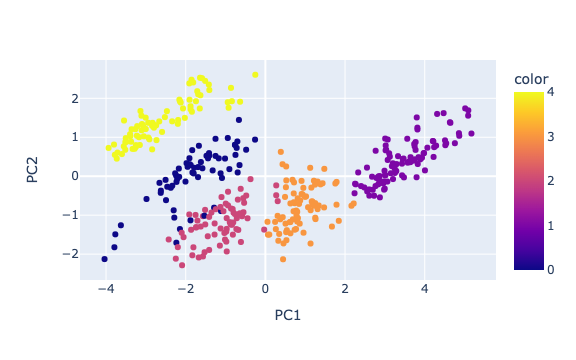

In [70]:
px.scatter(data_frame=df_pca, x='PC1', y='PC2', color=df_pred.pred)

In [71]:
df_pred.pred = df_pred.pred.astype(str)

In [94]:
hover = '''
<b>%{customdata[0]}</b><br><br>
PC1: %{x}<br>
PC2: %{y}<br>
'''

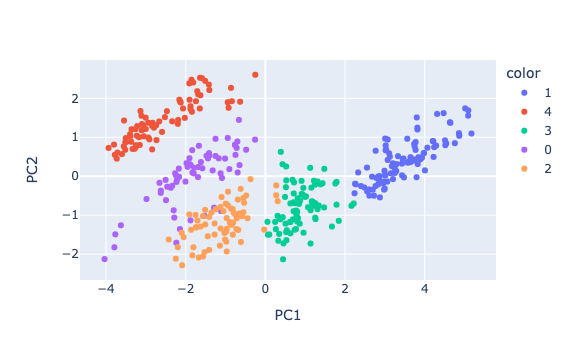

In [96]:
fig = px.scatter(data_frame=df_pca, x='PC1', y='PC2', color=df_pred.pred, hover_data=[df.index])

fig.update_traces(hovertemplate = hover)

### PCA & Clustering Interpretation

## Relationship between Original Variables & Components

- [ ] What do the columns PC1 & PC2 have to do with the original variables (speeding, alcohol, total,...)?

### Loading Vectors

In [74]:
pd.DataFrame(pca.components_.T, columns=df_pca.columns, index=df_norm.columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
mpg,-0.374705,-0.046189,-0.257296,-0.199342,0.031205,0.755299,0.354683,-0.195030,-0.127427
cylinders,0.390297,0.020630,-0.163054,0.222610,-0.000059,0.472667,-0.549276,0.314814,-0.383243
displacement,0.404817,0.014770,-0.150779,0.153581,-0.009156,0.297809,0.004035,-0.121299,0.828299
horsepower,0.385138,0.233024,-0.156907,-0.007860,0.169984,-0.055093,0.667713,0.528806,-0.123615
weight,0.390189,-0.040777,-0.136605,0.342554,0.205570,-0.106440,0.196891,-0.707468,-0.342374
acceleration,-0.249862,-0.447718,0.279268,0.743318,0.005795,0.103036,0.213376,0.221399,0.037513
model_year,-0.201926,-0.346888,-0.826340,0.063921,0.175107,-0.294713,-0.113877,0.128827,0.069917
origin_japan,-0.228405,0.607000,-0.276675,0.411797,-0.570073,-0.068650,0.033738,-0.047016,-0.014582
origin_usa,0.295694,-0.502024,-0.061804,-0.208639,-0.756379,-0.029489,0.168039,-0.013082,-0.108621


In [75]:
weights = pd.DataFrame(pca.components_.T, columns=df_pca.columns, index=df_norm.columns)

In [76]:
weights.style.applymap(lambda v: f'background-color: darkred; opacity: {int(v*100)+40}%;')\
        .applymap(lambda v: f'color: white')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
mpg,-0.374705,-0.046189,-0.257296,-0.199342,0.031205,0.755299,0.354683,-0.195030,-0.127427
cylinders,0.390297,0.020630,-0.163054,0.222610,-0.000059,0.472667,-0.549276,0.314814,-0.383243
displacement,0.404817,0.014770,-0.150779,0.153581,-0.009156,0.297809,0.004035,-0.121299,0.828299
horsepower,0.385138,0.233024,-0.156907,-0.007860,0.169984,-0.055093,0.667713,0.528806,-0.123615
weight,0.390189,-0.040777,-0.136605,0.342554,0.205570,-0.106440,0.196891,-0.707468,-0.342374
acceleration,-0.249862,-0.447718,0.279268,0.743318,0.005795,0.103036,0.213376,0.221399,0.037513
model_year,-0.201926,-0.346888,-0.826340,0.063921,0.175107,-0.294713,-0.113877,0.128827,0.069917
origin_japan,-0.228405,0.607000,-0.276675,0.411797,-0.570073,-0.068650,0.033738,-0.047016,-0.014582
origin_usa,0.295694,-0.502024,-0.061804,-0.208639,-0.756379,-0.029489,0.168039,-0.013082,-0.108621


### Correlation Matrix

In [77]:
df_corr = df_norm.corr()

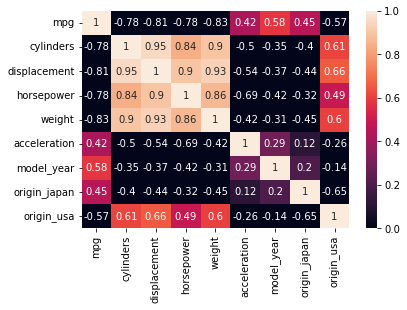

In [78]:
sns.heatmap(df_corr, annot=True, vmin=0, vmax=1);

- [ ] Which conclusions could you relate from the relationship of the 2 previous plots?

### Calculating One PCA Value

In [80]:
df_pca.head().style.applymap(lambda x: f'background-color: darkred; color: white' if round(x,2)==2.77 else False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
name,,,,,,,,,
chevrolet chevelle malibu,2.768102,0.653669,0.661643,-0.585333,-0.382837,0.750140,-0.468860,-0.095520,-0.120586
buick skylark 320,3.561796,0.961842,0.474659,-0.511149,-0.199102,0.489416,0.009370,0.213293,0.073620
plymouth satellite,3.070489,0.942217,0.473735,-0.870489,-0.313946,0.723960,-0.214271,0.143188,-0.083888
amc rebel sst,3.020337,0.789743,0.661786,-0.571355,-0.319349,0.528048,-0.229069,0.292331,-0.147325
ford torino,3.007717,0.965885,0.517871,-0.996022,-0.358667,0.575475,-0.469787,-0.001799,-0.174247


In [84]:
df_norm.loc['chevrolet chevelle malibu', :].iloc[0]

mpg            -0.698638
cylinders       1.483947
displacement    1.077290
horsepower      0.664133
weight          0.620540
acceleration   -1.285258
model_year     -1.625315
origin_japan   -0.502390
origin_usa      0.774597
Name: chevrolet chevelle malibu, dtype: float64

- [ ] How did we obtain `2.77` for **chevrolet chevelle malibu** in **PC1**?

In [85]:
weights.PC1

mpg            -0.374705
cylinders       0.390297
displacement    0.404817
horsepower      0.385138
weight          0.390189
acceleration   -0.249862
model_year     -0.201926
origin_japan   -0.228405
origin_usa      0.295694
Name: PC1, dtype: float64

In [87]:
df_norm.loc['chevrolet chevelle malibu', :].iloc[0]

mpg            -0.698638
cylinders       1.483947
displacement    1.077290
horsepower      0.664133
weight          0.620540
acceleration   -1.285258
model_year     -1.625315
origin_japan   -0.502390
origin_usa      0.774597
Name: chevrolet chevelle malibu, dtype: float64

In [89]:
(weights.PC1*df_norm.loc['chevrolet chevelle malibu', :].iloc[0]).sum()

2.7681015408712186

## Explained Variance Ratio

- You don't get the excellent plot below for free
- You lost something when representing 7 original variables into 2 Principal Components
- This loss is measured by the `pca.explained_variance_ratio_`
- **PC1 explains 57.34%** of the original variability
- Whereas **PC2 explains 22.54%** of the original variability

In [90]:
pca.explained_variance_ratio_.round(4)

array([0.6292, 0.1317, 0.0971, 0.0666, 0.0336, 0.0202, 0.0123, 0.0059,
       0.0034])

In [91]:
evr = pca.explained_variance_ratio_.round(2)

### Biplot

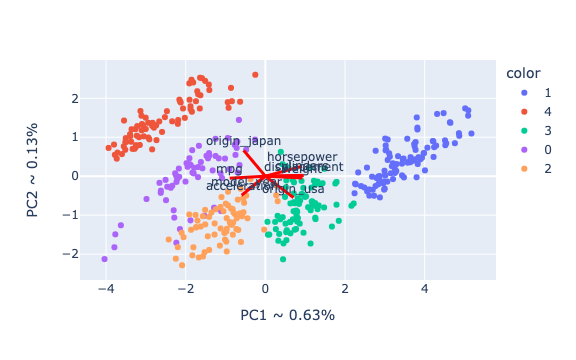

In [92]:
import numpy as np

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(df_pca, x='PC1', y='PC2',
                 color=model_km.labels_.astype(str),
                 hover_name=df_norm.index,
                labels={
                    'PC1': f'PC1 ~ {evr[0]}%',
                    'PC2': f'PC2 ~ {evr[1]}%'
                })

for i, feature in enumerate(df_norm.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1],
        line=dict(color="red",width=3)
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()

In [93]:
pca.explained_variance_ratio_.cumsum()

array([0.62920572, 0.76087875, 0.85793777, 0.92452975, 0.95815016,
       0.97839807, 0.99074516, 0.99663688, 1.        ])

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand the role of **Linear Algebra** on Machine Learning
    - Matrix Multiplications with the `loadings`
- [ ] Necessity to `StandardScaler()` the data when the algorithm implies distance calculations
- [ ] Understand that every Machine Learning process is a matter of optimization
    - To find the best numbers based on a criteria
    - How is done in `PCA()`?
- [ ] Why would you use PCA?
    - Visualization
    - Preprocess the data for modelling
- [ ] There are techniques for everything
    - [ ] Grouping observations
    - [ ] Grouping variables

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.